In [1]:
import requests
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import json
import pandas as pd

In [2]:
import jieba
import jieba.analyse
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://www.cupoy.com/MixNewsAction.do?op=getBuckets&groupid=Game_tw&len=100"
res = requests.get(url)
resjson= res.json()
data = [[d['name'], d['bucketid']] for d in resjson['buckets']]
df_buckets = pd.DataFrame(data, columns=['name', 'bucketid'])
df_buckets

,name,bucketid
0,遊戲情報,GameInformation_tw
1,電競,ElectronicSports_tw
2,英雄聯盟,LoL_tw


In [4]:
url = "https://www.cupoy.com/MixNewsAction.do?op=getBucketGroups&nationid=TW&len=20"
res = requests.get(url)
resjson= res.json()
resjson
data = [[d['name'], d['groupid']] for d in resjson]
df_groupid = pd.DataFrame(data, columns=['name', 'groupid'])
df_groupid

,name,groupid
0,科技,tech_tw
1,商業,business_tw
2,生活,life_tw
3,遊戲,Game_tw
4,運動,Sports_tw
5,設計,design_tw
6,閱讀,Reading_tw
7,3C達人,3CExpert_tw
8,御宅學園,GamePlayer_tw
9,親子家庭,Babyhome_tw


In [5]:
url = "https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNewsByBucketGroup&groupid=Game_tw&startNewsID=0&len=500"
res = requests.get(url)

resjson= res.json()

In [6]:
len(resjson['items'])

500

In [7]:
resjson['items'][0]

{'itemuid': '68747470733A2F2F6368696E6573652E656E6761646765742E636F6D2F6368696E6573652D323032302D30322D32322D7477697463682D6C65616775652D6F662D6C6567656E64732D73747265616D65722D657874656E73696F6E2E68746D6C',
 'newsid': '000001706C96FF4068747470733A2F2F6368696E6573652E656E6761646765742E636F6D2F6368696E6573652D323032302D30322D32322D7477697463682D6C65616775652D6F662D6C6567656E64732D73747265616D65722D657874656E73696F6E2E68746D6C',
 'itemsrctype': 2,
 'ctype': 5,
 'title': 'Twitch 專門為《英雄聯盟》打造了一個可以快速看到遊戲進程的工具',
 'description': '《英雄聯盟》經過這麼多年的發展，已經變得相當地複雜，對於一段時間沒有玩，或是單純只是當作娛樂在欣賞的人來說，很多時候會跟不上究竟比賽中發生了什麼，或是直播主究竟是以什麼樣的方式在升級角色。為了讓遊戲更清楚，也增進直播主與觀眾間的互動，Twitch',
 'thumbimgurl': 'https://s.yimg.com/uu/api/res/1.2/ajC.D7bETUMWdJwg8yrGKA--~B/dz0xNjAwO2g9OTk5O2FwcGlkPXl0YWNoeW9u/https://o.aolcdn.com/images/dimse/5845cadfecd996e0372f/6293b0eb36bea749a6e9336144b93282a3d969ba/cXVhbGl0eT04NSZpbWFnZV91cmk9aHR0cHMlM0ElMkYlMkZvLmFvbGNkbi5jb20lMkZpbWFnZXMlMkZkaW1zJTNGcmVzaXplJTNEMjAwMCUyNTJDMjAwMCUyNTJDc2hyaW5rJTI

In [8]:
columns = list(resjson['items'][0].keys())
columns.remove('thumbimgurl')
columns.remove('description')
columns

['itemuid',
 'newsid',
 'itemsrctype',
 'ctype',
 'title',
 'linkurl',
 'nationID',
 'publishtime',
 'bucketids',
 'bucketgrpids',
 'metrics',
 'isLike',
 'isCollect',
 'isLocalUpload']

In [9]:
data = [[d[c] for c in columns] for d in resjson['items']]
df = pd.DataFrame(data, columns=columns)
df.head(3)

,itemuid,newsid,itemsrctype,ctype,title,linkurl,nationID,publishtime,bucketids,bucketgrpids,metrics,isLike,isCollect,isLocalUpload
0,68747470733A2F2F6368696E6573652E656E6761646765...,000001706C96FF4068747470733A2F2F6368696E657365...,2,5,Twitch 專門為《英雄聯盟》打造了一個可以快速看到遊戲進程的工具,https://chinese.engadget.com/chinese-2020-02-2...,TW,1582369800000,"[GameInformation_tw, LoL_tw]","[GamePlayer_tw, Game_tw]","{'socialScorer': {'fb_shares': 0, 'fb_likes': ...",False,False,False
1,68747470733A2F2F6D6565742E626E6578742E636F6D2E...,000001706A9FDE7868747470733A2F2F6D6565742E626E...,2,5,善權謀的曹操、重仁德的劉備、懂傾聽的孫權，聰明人會選誰當老闆？,https://meet.bnext.com.tw/articles/view/42328,TW,1582336827000,[GameInformation_tw],"[GamePlayer_tw, Game_tw]","{'socialScorer': {'fb_shares': 122, 'fb_likes'...",False,False,False
2,68747470733A2F2F7777772E617A6F6672656577617265...,000001706D6E256068747470733A2F2F7777772E617A6F...,2,5,Wise Game Booster 1.5.5.79 免安裝中文版 - 專為遊戲設計的免費電...,https://www.azofreeware.com/2012/10/wise-game-...,TW,1582383900000,"[GameInformation_tw, app_tw]","[3CExpert_tw, GamePlayer_tw, Game_tw, tech_tw]","{'socialScorer': {'fb_shares': 14, 'fb_likes':...",False,False,False


In [10]:
def GetClassName(df):
    for index in df_buckets.index:
        e_name = df_buckets.loc[ index, 'bucketid']
        c_name = df_buckets.loc[ index, 'name']
        df[c_name] = df['bucketids'].apply(lambda x: 1 if e_name in x else 0)
    return df

In [11]:
df2 = GetClassName(df)
df2.head(3)

,itemuid,newsid,itemsrctype,ctype,title,linkurl,nationID,publishtime,bucketids,bucketgrpids,metrics,isLike,isCollect,isLocalUpload,遊戲情報,電競,英雄聯盟
0,68747470733A2F2F6368696E6573652E656E6761646765...,000001706C96FF4068747470733A2F2F6368696E657365...,2,5,Twitch 專門為《英雄聯盟》打造了一個可以快速看到遊戲進程的工具,https://chinese.engadget.com/chinese-2020-02-2...,TW,1582369800000,"[GameInformation_tw, LoL_tw]","[GamePlayer_tw, Game_tw]","{'socialScorer': {'fb_shares': 0, 'fb_likes': ...",False,False,False,1,0,1
1,68747470733A2F2F6D6565742E626E6578742E636F6D2E...,000001706A9FDE7868747470733A2F2F6D6565742E626E...,2,5,善權謀的曹操、重仁德的劉備、懂傾聽的孫權，聰明人會選誰當老闆？,https://meet.bnext.com.tw/articles/view/42328,TW,1582336827000,[GameInformation_tw],"[GamePlayer_tw, Game_tw]","{'socialScorer': {'fb_shares': 122, 'fb_likes'...",False,False,False,1,0,0
2,68747470733A2F2F7777772E617A6F6672656577617265...,000001706D6E256068747470733A2F2F7777772E617A6F...,2,5,Wise Game Booster 1.5.5.79 免安裝中文版 - 專為遊戲設計的免費電...,https://www.azofreeware.com/2012/10/wise-game-...,TW,1582383900000,"[GameInformation_tw, app_tw]","[3CExpert_tw, GamePlayer_tw, Game_tw, tech_tw]","{'socialScorer': {'fb_shares': 14, 'fb_likes':...",False,False,False,1,0,0


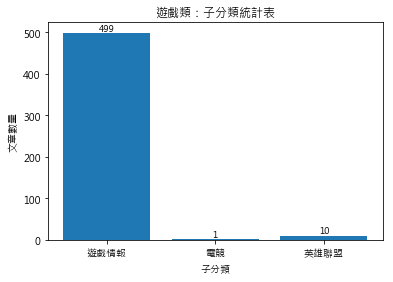

In [12]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

x = [d for d in df_buckets['name']]
y = [df2[d].sum() for d in df_buckets['name']]
plt.bar(x, y)
plt.title("遊戲類：子分類統計表")
plt.ylabel("文章數量")
plt.xlabel("子分類")
for a,b in zip(x,y):
    plt.text(a, b+0.001, '%.f' % b, ha='center', va= 'bottom',fontsize=9)
plt.show()

In [13]:
def GetClassName(df):
    for index in df_groupid.index:
        e_name = df_groupid.loc[ index, 'groupid']
        c_name = df_groupid.loc[ index, 'name']
        df[c_name] = df['bucketgrpids'].apply(lambda x: 1 if e_name in x else 0)
    return df

In [14]:
df3 = GetClassName(df)
df3.head(3)

,itemuid,newsid,itemsrctype,ctype,title,linkurl,nationID,publishtime,bucketids,bucketgrpids,...,閱讀,3C達人,御宅學園,親子家庭,文青聚落,健身瘦身,職場白領,國際財經,享樂女性,城市食旅
0,68747470733A2F2F6368696E6573652E656E6761646765...,000001706C96FF4068747470733A2F2F6368696E657365...,2,5,Twitch 專門為《英雄聯盟》打造了一個可以快速看到遊戲進程的工具,https://chinese.engadget.com/chinese-2020-02-2...,TW,1582369800000,"[GameInformation_tw, LoL_tw]","[GamePlayer_tw, Game_tw]",...,0,0,1,0,0,0,0,0,0,0
1,68747470733A2F2F6D6565742E626E6578742E636F6D2E...,000001706A9FDE7868747470733A2F2F6D6565742E626E...,2,5,善權謀的曹操、重仁德的劉備、懂傾聽的孫權，聰明人會選誰當老闆？,https://meet.bnext.com.tw/articles/view/42328,TW,1582336827000,[GameInformation_tw],"[GamePlayer_tw, Game_tw]",...,0,0,1,0,0,0,0,0,0,0
2,68747470733A2F2F7777772E617A6F6672656577617265...,000001706D6E256068747470733A2F2F7777772E617A6F...,2,5,Wise Game Booster 1.5.5.79 免安裝中文版 - 專為遊戲設計的免費電...,https://www.azofreeware.com/2012/10/wise-game-...,TW,1582383900000,"[GameInformation_tw, app_tw]","[3CExpert_tw, GamePlayer_tw, Game_tw, tech_tw]",...,0,1,1,0,0,0,0,0,0,0


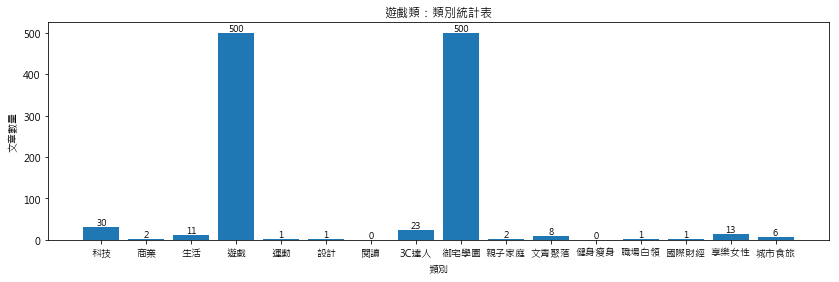

In [15]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

x = [d for d in df_groupid['name']]
y = [df3[d].sum() for d in df_groupid['name']]
plt.bar(x, y)
plt.title("遊戲類：類別統計表")
plt.ylabel("文章數量")
plt.xlabel("類別")
for a,b in zip(x,y):
    plt.text(a, b+0.001, '%.f' % b, ha='center', va= 'bottom',fontsize=9)
    

fig = plt.gcf()
fig.set_size_inches(14, 4)
plt.show()

In [16]:
df_scores = df[['title', 'metrics', 'linkurl']]

In [17]:
for i in df_scores['metrics'].index:
    df_scores.loc[i, '文章活躍度'] = df_scores.loc[i,'metrics']['uidactscore']

In [18]:
df_scores = df_scores.sort_values(by=['文章活躍度'], ascending=False)
df_scores = df_scores[df_scores['文章活躍度']>=60]
df_scores = df_scores[['title','文章活躍度', 'linkurl']]
df_scores

,title,文章活躍度,linkurl
9,返校、還願成為哈佛大學館藏 能在圖書館體驗 (151884) - 癮科技 Cool3c,85.0,https://www.cool3c.com/article/151884?utm_sour...
0,Twitch 專門為《英雄聯盟》打造了一個可以快速看到遊戲進程的工具,60.0,https://chinese.engadget.com/chinese-2020-02-2...
18,《絕地求生》PS4 與 Xbox One 的玩家終於可以互相邀請來聯機了,60.0,https://chinese.engadget.com/chinese-2020-02-2...
43,《虹彩六號：圍攻行動》將與 PS5 和 Xbox Series X 同時推出,60.0,https://chinese.engadget.com/chinese-2020-02-1...
42,《刺客教條：梟雄》將會在 Epic Games 商城免費開放下載,60.0,https://chinese.engadget.com/chinese-2020-02-1...
41,《巫師 3：狂獵》Switch 版本的更新帶來跨平臺儲存功能,60.0,https://chinese.engadget.com/chinese-2020-02-1...
38,《GTA IV》將於下月重回 Steam 的懷抱，可惜並不包含多人線上模式,60.0,https://chinese.engadget.com/chinese-2020-02-2...


In [19]:
def GetDescription(index):
    print('文章活躍度:', df_scores.loc[index,'文章活躍度'])
    print('標題:', df_scores.loc[index,'title'])
    print('連結:', df_scores.loc[index,'linkurl'])
    return resjson['items'][index]['description']

In [20]:
def GetTFIDF(sentence):
    stopWords=[]
    with open('stopWords.txt', 'r', encoding='UTF-8') as file:
        for data in file.readlines():
            data = data.strip()
            stopWords.append(data)
    keywords = jieba.analyse.extract_tags(sentence, topK=25, withWeight=True)
    value={}
    for item in keywords:
        if item[0] not in stopWords:
            value[item[0]]=item[1]
    return value

In [21]:
def GetWordCloud(value):
    font_path = r'C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NotoSansCJKtc-Black.otf'
    wc = WordCloud(
        font_path=font_path, #設置字體
        background_color="white", #背景顏色
        max_words = 25  #文字雲顯示最大詞數
    )
    wc.generate_from_frequencies(value)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(15,10), dpi = 100)
    plt.show()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache


文章活躍度: 85.0
標題: 返校、還願成為哈佛大學館藏 能在圖書館體驗 (151884) - 癮科技 Cool3c
連結: https://www.cool3c.com/article/151884?utm_source=Facebook&utm_medium=INSIDE&utm_campaign=Devotion-Harvard


Loading model cost 0.693 seconds.
Prefix dict has been built successfully.


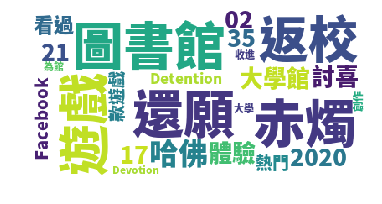

<Figure size 1500x1000 with 0 Axes>

文章活躍度: 60.0
標題: Twitch 專門為《英雄聯盟》打造了一個可以快速看到遊戲進程的工具
連結: https://chinese.engadget.com/chinese-2020-02-22-twitch-league-of-legends-streamer-extension.html


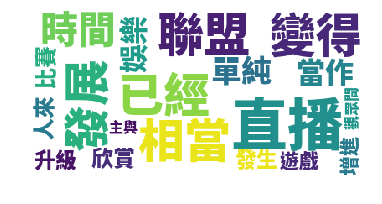

<Figure size 1500x1000 with 0 Axes>

文章活躍度: 60.0
標題: 《絕地求生》PS4 與 Xbox One 的玩家終於可以互相邀請來聯機了
連結: https://chinese.engadget.com/chinese-2020-02-21-pubg-cross-party-play-ps4-xbox-one.html


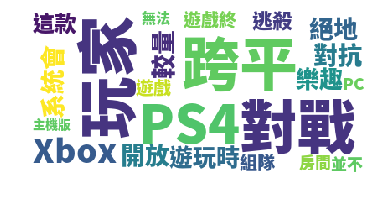

<Figure size 1500x1000 with 0 Axes>

文章活躍度: 60.0
標題: 《虹彩六號：圍攻行動》將與 PS5 和 Xbox Series X 同時推出
連結: https://chinese.engadget.com/chinese-2020-02-17-rainbow-six-siege-next-gen-consoles-at-launch.html


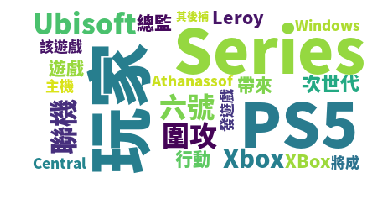

<Figure size 1500x1000 with 0 Axes>

文章活躍度: 60.0
標題: 《刺客教條：梟雄》將會在 Epic Games 商城免費開放下載
連結: https://chinese.engadget.com/chinese-2020-02-18-assassins-creed-syndicate-free-on-epic-games-store.html


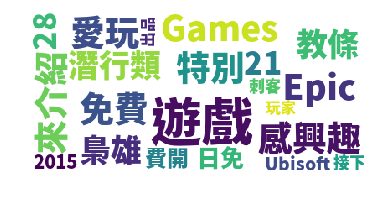

<Figure size 1500x1000 with 0 Axes>

文章活躍度: 60.0
標題: 《巫師 3：狂獵》Switch 版本的更新帶來跨平臺儲存功能
連結: https://chinese.engadget.com/chinese-2020-02-19-the-witcher-3-nintendo-switch-pc-cross-save-graphics-languages.html


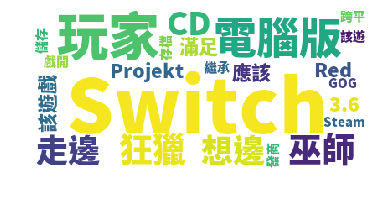

<Figure size 1500x1000 with 0 Axes>

文章活躍度: 60.0
標題: 《GTA IV》將於下月重回 Steam 的懷抱，可惜並不包含多人線上模式
連結: https://chinese.engadget.com/chinese-2020-02-20-gta4-complete-steam-march.html


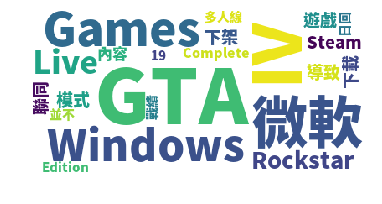

<Figure size 1500x1000 with 0 Axes>

In [22]:
for index in df_scores.index:
    sentence = GetDescription(index)
    value = GetTFIDF(sentence)
    GetWordCloud(value)

In [23]:
sentence = ''
for title in df_scores['title']:
    sentence+=f'{title}\n'
sentence

'返校、還願成為哈佛大學館藏 能在圖書館體驗 (151884) - 癮科技 Cool3c\nTwitch 專門為《英雄聯盟》打造了一個可以快速看到遊戲進程的工具\n《絕地求生》PS4 與 Xbox One 的玩家終於可以互相邀請來聯機了\n《虹彩六號：圍攻行動》將與 PS5 和 Xbox Series X 同時推出\n《刺客教條：梟雄》將會在 Epic Games 商城免費開放下載\n《巫師 3：狂獵》Switch 版本的更新帶來跨平臺儲存功能\n《GTA IV》將於下月重回 Steam 的懷抱，可惜並不包含多人線上模式\n'

In [24]:
stopWords=[]
firstWords = []
FinalWords = []
with open('stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [25]:
# #新增自定義詞
jieba.add_word('館藏')
jieba.add_word('科技新報')
jieba.add_word('T客邦')
jieba.add_word('虹彩六號')
jieba.add_word('圍攻行動')
jieba.add_word('刺客教條')

In [26]:
keywords = jieba.analyse.extract_tags(sentence, topK=25, withWeight=True)
value={}
for item in keywords:
    if item[0] not in stopWords:
        value[item[0]]=item[1]
value

{'Xbox': 0.34651500008405794,
 '還願': 0.17325750004202897,
 '大學': 0.17325750004202897,
 '館藏': 0.17325750004202897,
 '圖書館': 0.17325750004202897,
 '體驗': 0.17325750004202897,
 'Cool3c': 0.17325750004202897,
 'Twitch': 0.17325750004202897,
 '專門': 0.17325750004202897,
 '聯盟': 0.17325750004202897,
 '遊戲': 0.17325750004202897,
 '進程': 0.17325750004202897,
 '絕地': 0.17325750004202897,
 'PS4': 0.17325750004202897,
 '終於': 0.17325750004202897,
 '邀請': 0.17325750004202897,
 '聯機': 0.17325750004202897,
 '虹彩六號': 0.17325750004202897,
 '圍攻行動': 0.17325750004202897,
 'PS5': 0.17325750004202897,
 'Series': 0.17325750004202897}

In [27]:
font_path = r'C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NotoSansCJKtc-Black.otf'
wc = WordCloud(
    font_path=font_path, #設置字體
    background_color="white", #背景顏色
    max_words = 25  #文字雲顯示最大詞數
)

In [28]:
wc.generate_from_frequencies(value)

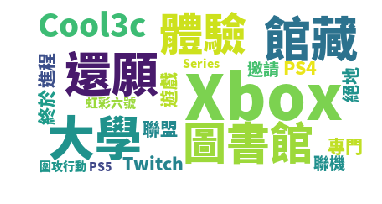

<Figure size 1500x1000 with 0 Axes>

In [29]:
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(15,10), dpi = 100)
plt.show()